In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Using a random dataset created by numpy
np.random.seed(12)
num_observations = 300

# Generate random data for two classes
X_classA = np.random.multivariate_normal([2, 2], [[1, 0.5], [0.5, 1]], num_observations // 2)
X_classB = np.random.multivariate_normal([4, 4], [[1, 0.5], [0.5, 1]], num_observations // 2)

In [4]:
# Push the data into an array
X = np.vstack((X_classA, X_classB))
y = np.hstack((np.zeros(num_observations // 2), np.ones(num_observations // 2)))

# Add x0 = 1 for every instance (for the intercept term)
X_b = np.c_[np.ones((num_observations, 1)), X]

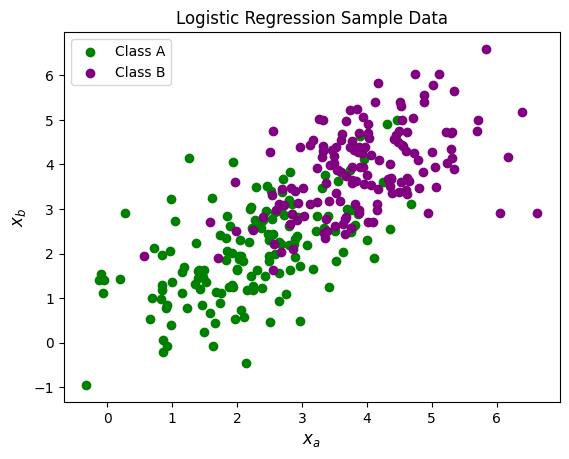

In [5]:
# 2A. Plot the data
plt.scatter(X_classA[:, 0], X_classA[:, 1], color='green', label='Class A')
plt.scatter(X_classB[:, 0], X_classB[:, 1], color='purple', label='Class B')

plt.xlabel("$x_a$", fontsize=12)
plt.ylabel("$x_b$", fontsize=12)

plt.legend()
plt.title("Logistic Regression Sample Data")
plt.show()

In [6]:
class Algorithms:

    # 2B. Compute Sigmoid Function
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    # 2C. Compute Logistic Regression Cost Function
    @staticmethod
    def logistic_cost(X, y, theta):
        m = len(y)
        h = Algorithms.sigmoid(X.dot(theta))
        cost = (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
        
        return cost
    
    # 2D. Prediction Function
    @staticmethod
    def predict(X, theta):
        return np.round(Algorithms.sigmoid(X.dot(theta))) >= 0.5
    
    # 2E. Regularized Cost Function
    @staticmethod
    def compute_cost_regularized(X, y, theta, _lambda):
        m = len(y)
        h = Algorithms.sigmoid(X.dot(theta))
        regularized_term = (_lambda / (2 * m)) * np.sum(np.square(theta[1:]))
        
        return (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) + regularized_term

In [7]:
# Run prediction function

# Initialize theta
theta = np.random.randn(X_b.shape[1])

# Compute the cost
cost = Algorithms.logistic_cost(X_b, y, theta)
print(f"Initial Cost: {cost}")

# Make a prediction
y_pred = Algorithms.predict(X_b, theta)
print(f"Predictions: {y_pred}")

# Compute the regularized cost
_lambda = 1
cost_regularized = Algorithms.compute_cost_regularized(X_b, y, theta, _lambda)
print(f"Initial Regularized Cost: {cost_regularized}")

Initial Cost: 1.11798872235708
Predictions: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False  True False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False 